Exercicio 6 - SAA0336\
Nome: Alessandro Melo de Oliveira\
Nº USP: 10788662

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from sympy.plotting import plot
from numpy.polynomial import Polynomial
from scipy.integrate import quad
from pandas.plotting import table 

In [2]:
n2_limite = 4.3746
n2_ultimate = 6.5619

b = 2260.5/1000 #envergadura [m]
S = (928554.75 / 1e6) # area da asa [m^2]
    

W = sum([1.10, 2.68, 2.68, 1.07, 0.84, 0.63, 0.45, 0.33, 0.22])
W += 54.84 + 60 + 100
L = n2_limite * W

V_2 = 29.5 # [m/s]

pressao_dinamica = 0.5 * 1.225 * (V_2**2)
Cni = ((L) / (S)) / pressao_dinamica

In [3]:
nervuras = [0,1,2,3,4,5,6,7,8]

sustentacao = [155.78, 540.69, 638.48, 484.19, 436.33, 382.20, 294.12, 200.86, 83.25 ]
caso_de_carga_2 = pd.DataFrame()
caso_de_carga_2.set_index = nervuras
caso_de_carga_2.index.name = "Nervuras"
caso_de_carga_2['Sustentação [N]'] = [i/3 for i in sustentacao]

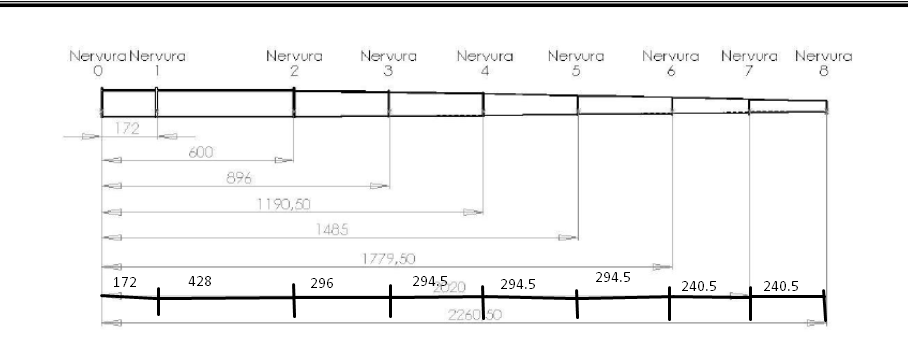

In [4]:
distancias = [0, 172, 600, 896, 1190.50, 1485, 1779.5, 2020, 2260.5] # a cortante é zero na ponta [mm]

def get_corda(x):
    x1,y1 = 600, 525
    x2,y2 = 2260.5, 214
    
    corda = np.interp(x, [x1,x2], [y1,y2])

    return corda

cordas = [round(get_corda(i),2) for i in distancias[3:]]
cordas = [525,525,525]  + cordas 

distancias_nervuras = pd.DataFrame()
distancias_nervuras.set_index = nervuras[::-1]
distancias_nervuras.index.name = "Estação nº"
distancias_nervuras['Yi [m]'] = [i/1000 for i in distancias][::-1]
distancias_nervuras['Comprimento da corda Ci [m]'] = [i/1000 for i in cordas][::-1]

In [25]:
distancias_nervuras

,Yi [m],Comprimento da corda Ci [m]
Estação nº,,
0,2.2605,0.21400
1,2.0200,0.25904
2,1.7795,0.30409
3,1.4850,0.35925
4,1.1905,0.41440
5,0.8960,0.46956
6,0.6000,0.52500
7,0.1720,0.52500
8,0.0000,0.52500


In [5]:
forcas_momentos = pd.DataFrame()
forcas_momentos.set_index = nervuras[::-1]
forcas_momentos.index.name = "Estação nº"
forcas_momentos['Coeficiente de Força Cni'] = [0] + [Cni] * (len(nervuras) - 1)
forcas_momentos['Força de Corte Vi [N]'] = [0] * len(nervuras)
forcas_momentos['Momento de Flexão [N.m]'] = [0] * len(nervuras)
tabela_completa = distancias_nervuras.join(forcas_momentos)

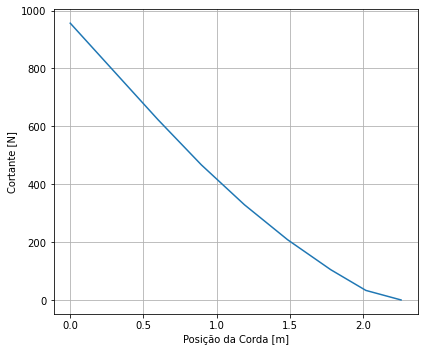

In [6]:
def numerico_cortante(tabela, graph = False, save_graph = False):
    for i in range(1,len(tabela)):
        Ci = tabela.iloc[i,1]
        Cni = tabela.iloc[i,2]
        C_i_1 = tabela.iloc[i-1,1]
        Cn_i_1 = tabela.iloc[i-1,2]
        Vi_1 = tabela.iloc[i-1,3]
        Yi = tabela.iloc[i,0]
        Yi_1 = tabela.iloc[i-1,0]
        
        Vi = Vi_1 + 0.5 * pressao_dinamica * (Ci*Cni + C_i_1*Cn_i_1) * (Yi_1 - Yi)
        tabela.iloc[i,3] = Vi
        
    if graph == True:
        fig = plt.figure(figsize=(6,5))
        plt.plot(tabela.iloc[:,0], tabela.iloc[:,3])
        plt.xlabel("Posição da Corda [m]")
        plt.ylabel("Cortante [N]")
        plt.grid()
        plt.tight_layout()
        
        if save_graph == True:
            plt.savefig("cortante_aproximado.pdf")
            
        plt.show()
            
        
numerico_cortante(tabela_completa, True, True)

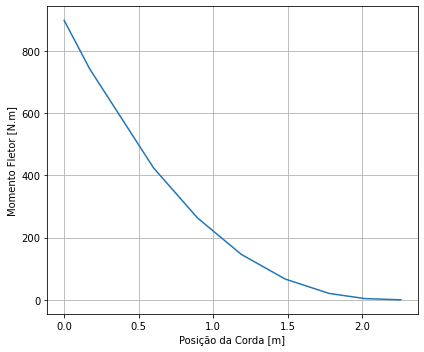

In [7]:
def numerico_momento(tabela, graph = False, save_graph = False):
    for i in range(1, len(tabela)):
        Mi_1 = tabela_completa.iloc[i-1,4]
        Vi = tabela.iloc[i,3]
        Vi_1 = tabela.iloc[i-1,3]
        Yi = tabela.iloc[i,0]
        Yi_1 = tabela.iloc[i-1,0]
        
        Mi = Mi_1 + 0.5 * (Vi + Vi_1) * (Yi_1 - Yi)
        tabela.iloc[i,4] = Mi
        
    if graph == True:
        fig = plt.figure(figsize=(6,5))
        plt.plot(tabela.iloc[:,0], tabela.iloc[:,4])
        plt.xlabel("Posição da Corda [m]")
        plt.ylabel("Momento Fletor [N.m]")
        plt.grid()
        plt.tight_layout()
        
        if save_graph == True:
            plt.savefig("momento_aproximado.pdf")
            
        plt.show()


numerico_momento(tabela_completa, True, True)

In [26]:
tabela_completa

,Yi [m],Comprimento da corda Ci [m],Coeficiente de Força Cni,Força de Corte Vi [N],Momento de Flexão [N.m]
Estação nº,,,,,
0,2.2605,0.21400,0.000000,0.000000,0.000000
1,2.0200,0.25904,1.987258,32.995622,3.967724
2,1.7795,0.30409,1.987258,104.725181,20.528650
3,1.4850,0.35925,1.987258,208.190762,66.605523
4,1.1905,0.41440,1.987258,328.862132,145.686561
5,0.8960,0.46956,1.987258,466.739290,262.838871
6,0.6000,0.52500,1.987258,622.657598,424.069610
7,0.1720,0.52500,1.987258,860.674327,741.502642
8,0.0000,0.52500,1.987258,956.325910,897.764663


## Stender

Piecewise((0.525, (x >= 0) & (x < 0.6)), (0.637375790424571 - 0.187292984040951*x, (x > 0.6) & (x < 2.2605)))

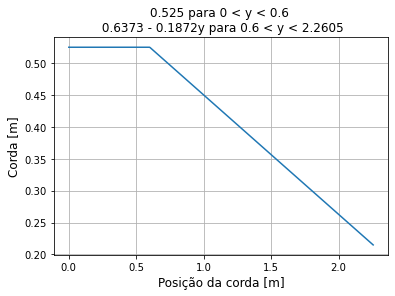

In [9]:
A,B, x, y = sp.symbols('A,B, x, y')

def corda_real(graph = False):
    
    x = sp.Symbol('x')

    x1, y1 = 0.6, 0.525
    x2, y2 = b, 0.214

    coefficients = np.polyfit([x1,x2], [y1,y2], 1)

    slope = coefficients[0]
    intercept = coefficients[1]

    exp1 = 0.525
    exp2 = slope*x + intercept

    Cg = sp.Piecewise((exp1, (x >= 0)  & (x < 0.6)), ((exp2, (x > 0.6) & (x < b))))
    
    if graph == True:
        
        fig_cg = plt.figure(figsize=(6,4))
        range_cg = np.linspace(0,b,500)
        plt.plot(range_cg, [Cg.subs(x,i) for i in range_cg])
        plt.grid()
        plt.xlabel("Posição da corda [m]", fontsize = 12)
        plt.ylabel("Corda [m]", fontsize = 12)
        plt.title("0.525 para 0 < y < 0.6 \n 0.6373 - 0.1872y para 0.6 < y < 2.2605", fontsize = 12)
    
    return Cg

#plot_cg = plot(corda_real(), show = True)

corda_real(True)

In [10]:
def elipse_stender():
    
    A,B, x, y = sp.symbols('A,B,x, y')
    
    A = b # envergadura [m]
    B = S / (np.pi * A)
        
    A2B2 = (A**2) * (B**2) 
    X2B2 = (x**2) * (B**2)
    A2 = (A**2)
    
    y = sp.sqrt((A2B2 - X2B2)/(A2))
    Ce = 4 * y
    B
    
    return Ce


In [11]:
Cg = corda_real(False)
Ce = elipse_stender()
Cs = sp.sqrt(Ce * Cg)

In [12]:
interval = np.linspace(0,b,500)

corda_elipse = [Ce.subs(x, i) for i in interval]
corda_real = [Cg.subs(x,i) for i in interval]
corda_stender = [Cs.subs(x,i) for i in interval]

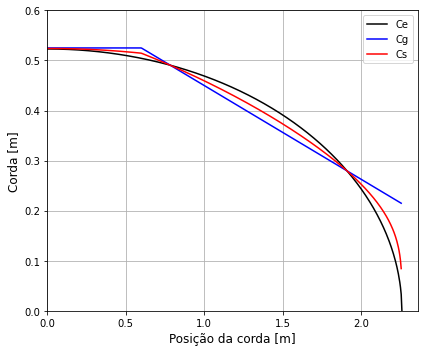

In [13]:
def graph_cordas(save_graph =  False):
    
    fig_cordas = plt.figure(figsize=(6,5))
    plt.plot(interval, corda_elipse, label = "Ce", color = 'k')
    plt.plot(interval, corda_real, label = "Cg", color = 'b')
    plt.plot(interval, corda_stender, label = "Cs", color = 'r')
    plt.legend()
    plt.grid()
    plt.ylim([0, .6])
    plt.xlim([0, b+.1])
    plt.xlabel("Posição da corda [m]", fontsize = 12)
    plt.ylabel("Corda [m]", fontsize = 12)
    plt.tight_layout()
    
    if save_graph == True:
        plt.savefig("cordas_cg_ce_cs.pdf")
    
    plt.show()
    
graph_cordas(True)

In [14]:
def poly_stender():
    
    x = np.asarray(interval[:-1], dtype=np.float32)
    y = np.asarray(corda_stender[:-1], dtype=np.float32)
    
    poly = Polynomial.fit(x,y,deg = 15)
    
    return poly
    
poly_cs = poly_stender()

D:\Program_Files\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


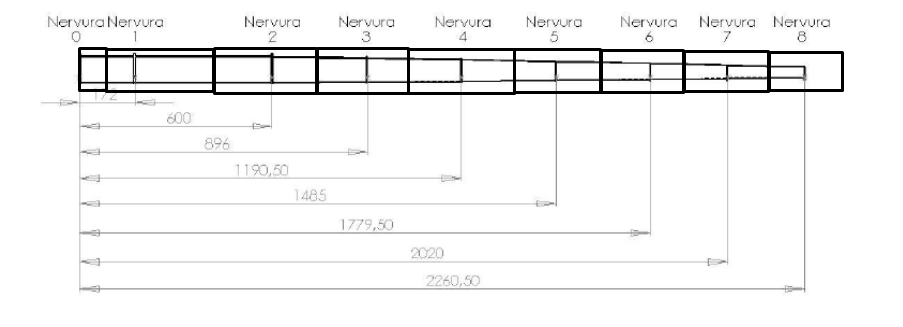

In [15]:
dyi = list(tabela_completa.iloc[:,0][::-1])
dyi_stender = [0]

for i in range(0,8):
    
    di = dyi[i] + (dyi[i+1] - dyi[i])/2
    dyi_stender.append(di)
    
dyi_stender.append(dyi[-1])

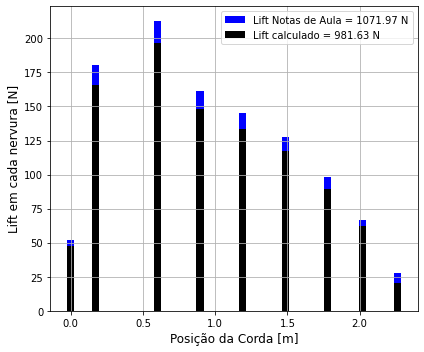

In [16]:
data_stender = pd.DataFrame()


def li_stender(graph = False, compare = False, save_graph = False):
    
    delta_Si_list = []
    Li_list = []
    
    
    dx_list = dyi_stender
    dx_list2 = list(tabela_completa.iloc[:,0])[::-1]
    
    for i in range(0, len(dx_list) - 1):
        a = dx_list[i]
        b = dx_list[i+1]
        
        delta_Si = quad(poly_cs, a,b)[0]
        Li = (delta_Si/S)*L
        
        delta_Si_list.append(delta_Si)
        Li_list.append(Li)
        
    data_stender['$\Delta$ Si'] = delta_Si_list
    data_stender['Li [N]'] = Li_list
        
    Lift = sum(Li_list)
        
        
    if graph == True:
        fig_lift = plt.figure(figsize=(6,5))
        
        
        if compare == True:
            plt.bar(dx_list2, caso_de_carga_2.iloc[:,0], width=0.05, label = "Lift Notas de Aula = {} N".format(round(caso_de_carga_2.iloc[:,0].sum(), 2)),
               color = 'b', alpha = 1)
        
        plt.bar(dx_list2, Li_list, width=0.05, label = "Lift calculado = {} N".format(round(Lift, 2)),
               color = 'k', alpha = 1)
        
        
        
        plt.grid()
        plt.legend()
        plt.xlabel("Posição da Corda [m]", fontsize = 12)
        plt.ylabel("Lift em cada nervura [N]", fontsize = 12)
        plt.tight_layout()
        
        if save_graph == True:
            plt.savefig("stender_aulas.pdf")
        
        
li_stender(True, True, True)

In [17]:
Lift_Stender = data_stender.iloc[:,1].sum()
Cni_Stender = (Lift_Stender/S)/pressao_dinamica
Cni_Stender

1.9833131668449406

In [27]:
data_stender

,$\Delta$ Si,Li [N]
0,0.045033,47.702024
1,0.156692,165.978079
2,0.185505,196.499040
3,0.140203,148.512002
4,0.126287,133.771565
5,0.110744,117.306707
6,0.084474,89.480031
7,0.058840,62.327265
8,0.018934,20.055803
